In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sklearn as sk

In [14]:
color_palette = sns.color_palette("Set3")
color_palette

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

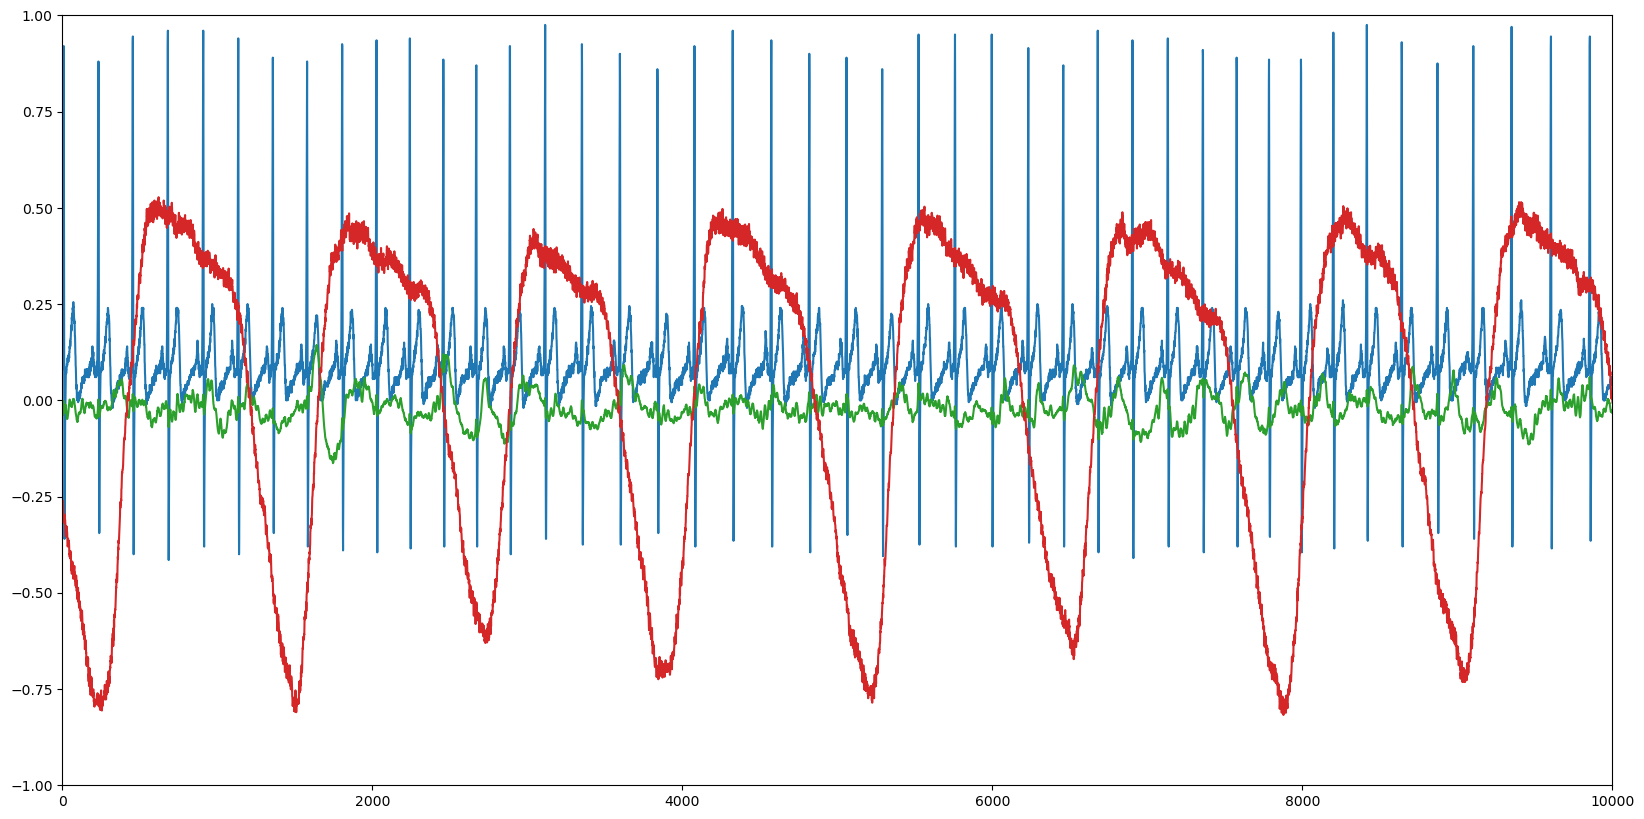

In [17]:
# read using wfdb from data 

data_loc = "data/mit_bih_psg/"

# read the data
record = wfdb.rdrecord(data_loc + "slp01a")

# read the annotation
annotation = wfdb.rdann(data_loc + "slp01a", "st")

# plot the signal
plt.figure(figsize=(20, 10))
plt.plot(record.p_signal)
# set y limit and x limit
plt.xlim(0, 10000)
plt.ylim(-1, 1)
plt.show()

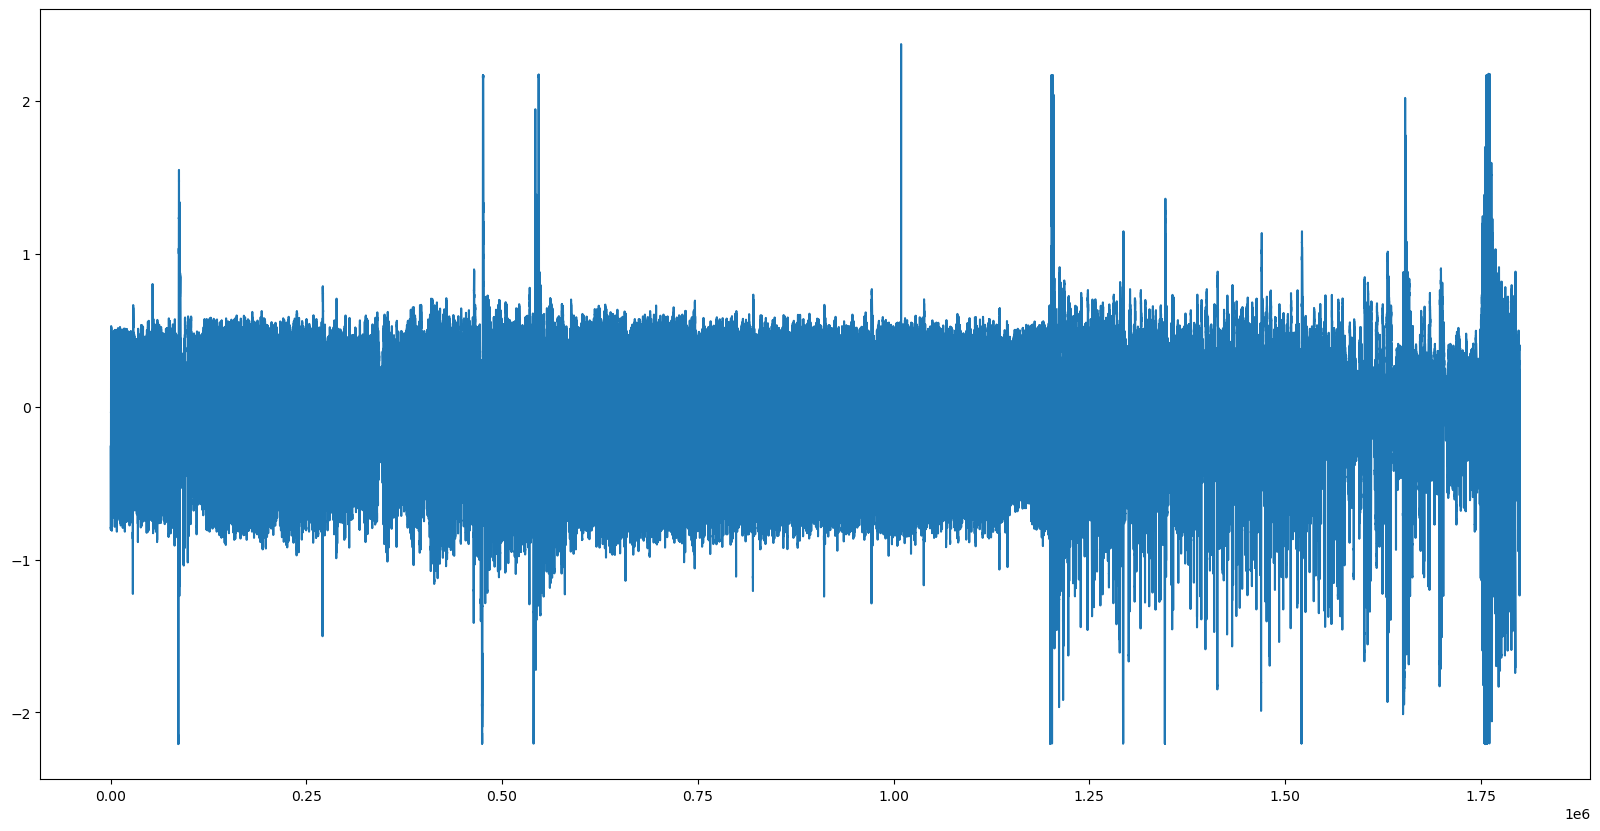

In [25]:
#check what is available in record
record.__dict__
# get 4th signal
record.p_signal[:, 3]

# plot 4th signal with annotation
plt.figure(figsize=(20, 10))
plt.plot(record.p_signal[:, 3])
# set y limit and x limit
# plt.ylim(-1, 1)
# plot the annotation
# plt.plot(annotation.sample, np.zeros(len(annotation.sample)), "ro")
plt.show()

In [26]:
annotation.__dict__

{'record_name': 'slp01a',
 'extension': 'st',
 'sample': array([      1,    7500,   15000,   22500,   30000,   37500,   45000,
          52500,   60000,   67500,   75000,   82500,   90000,   97500,
         105000,  112500,  120000,  127500,  135000,  142500,  150000,
         157500,  165000,  172500,  180000,  187500,  195000,  202500,
         210000,  217500,  225000,  232500,  240000,  247500,  255000,
         262500,  270000,  277500,  285000,  292500,  300000,  307500,
         315000,  322500,  330000,  337500,  345000,  352500,  360000,
         367500,  375000,  382500,  390000,  397500,  405000,  412500,
         420000,  427500,  435000,  442500,  450000,  457500,  465000,
         472500,  480000,  487500,  495000,  502500,  510000,  517500,
         525000,  532500,  540000,  547500,  555000,  562500,  570000,
         577500,  585000,  592500,  600000,  607500,  615000,  622500,
         630000,  637500,  645000,  652500,  660000,  667500,  675000,
         682500,  690

In [33]:
len(annotation.__dict__["sample"])

240

In [34]:
len(df["signal"])

1800000

<Axes: xlabel='time'>

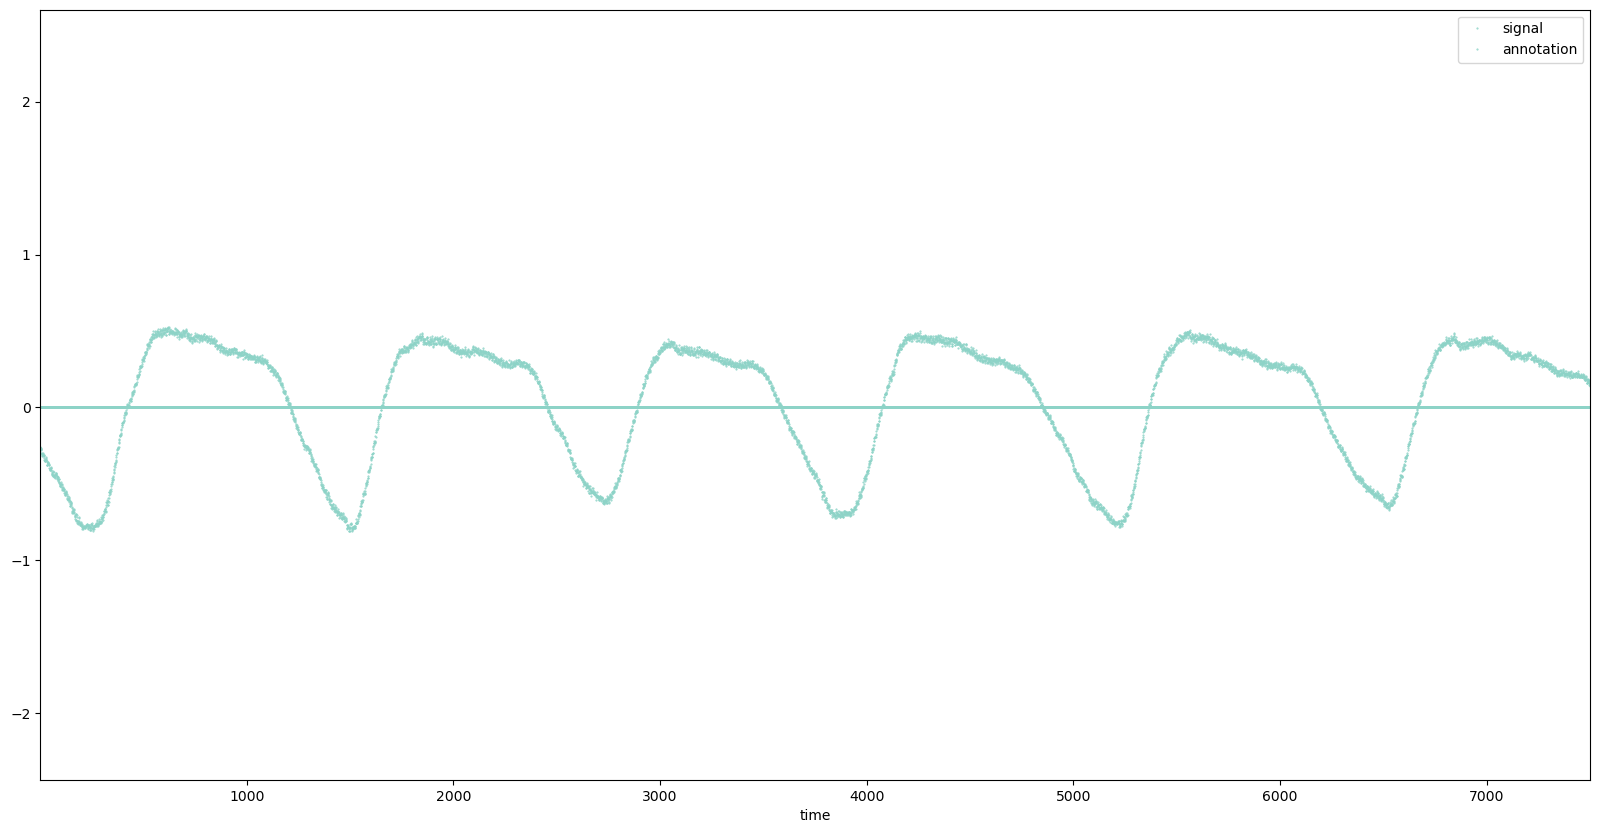

In [30]:
# create a dataframe with time, 4th signal and annotation
df = pd.DataFrame({"time": np.arange(len(record.p_signal[:, 3]))})
df["signal"] = record.p_signal[:, 3]
df["annotation"] = np.zeros(len(record.p_signal[:, 3]))


# set time to index 
df.set_index("time", inplace=True)

# each annotation is present for 7500 intervals of signal
# plot only first 7500 intervals
df.plot(style=".",
        ms=1,
        figsize=(20, 10),
        color=color_palette[0],
        xlim=(1, 7500))


In [54]:
annotation.__dict__.keys()

dict_keys(['record_name', 'extension', 'sample', 'symbol', 'subtype', 'chan', 'num', 'aux_note', 'fs', 'label_store', 'description', 'custom_labels', 'contained_labels', 'ann_len'])

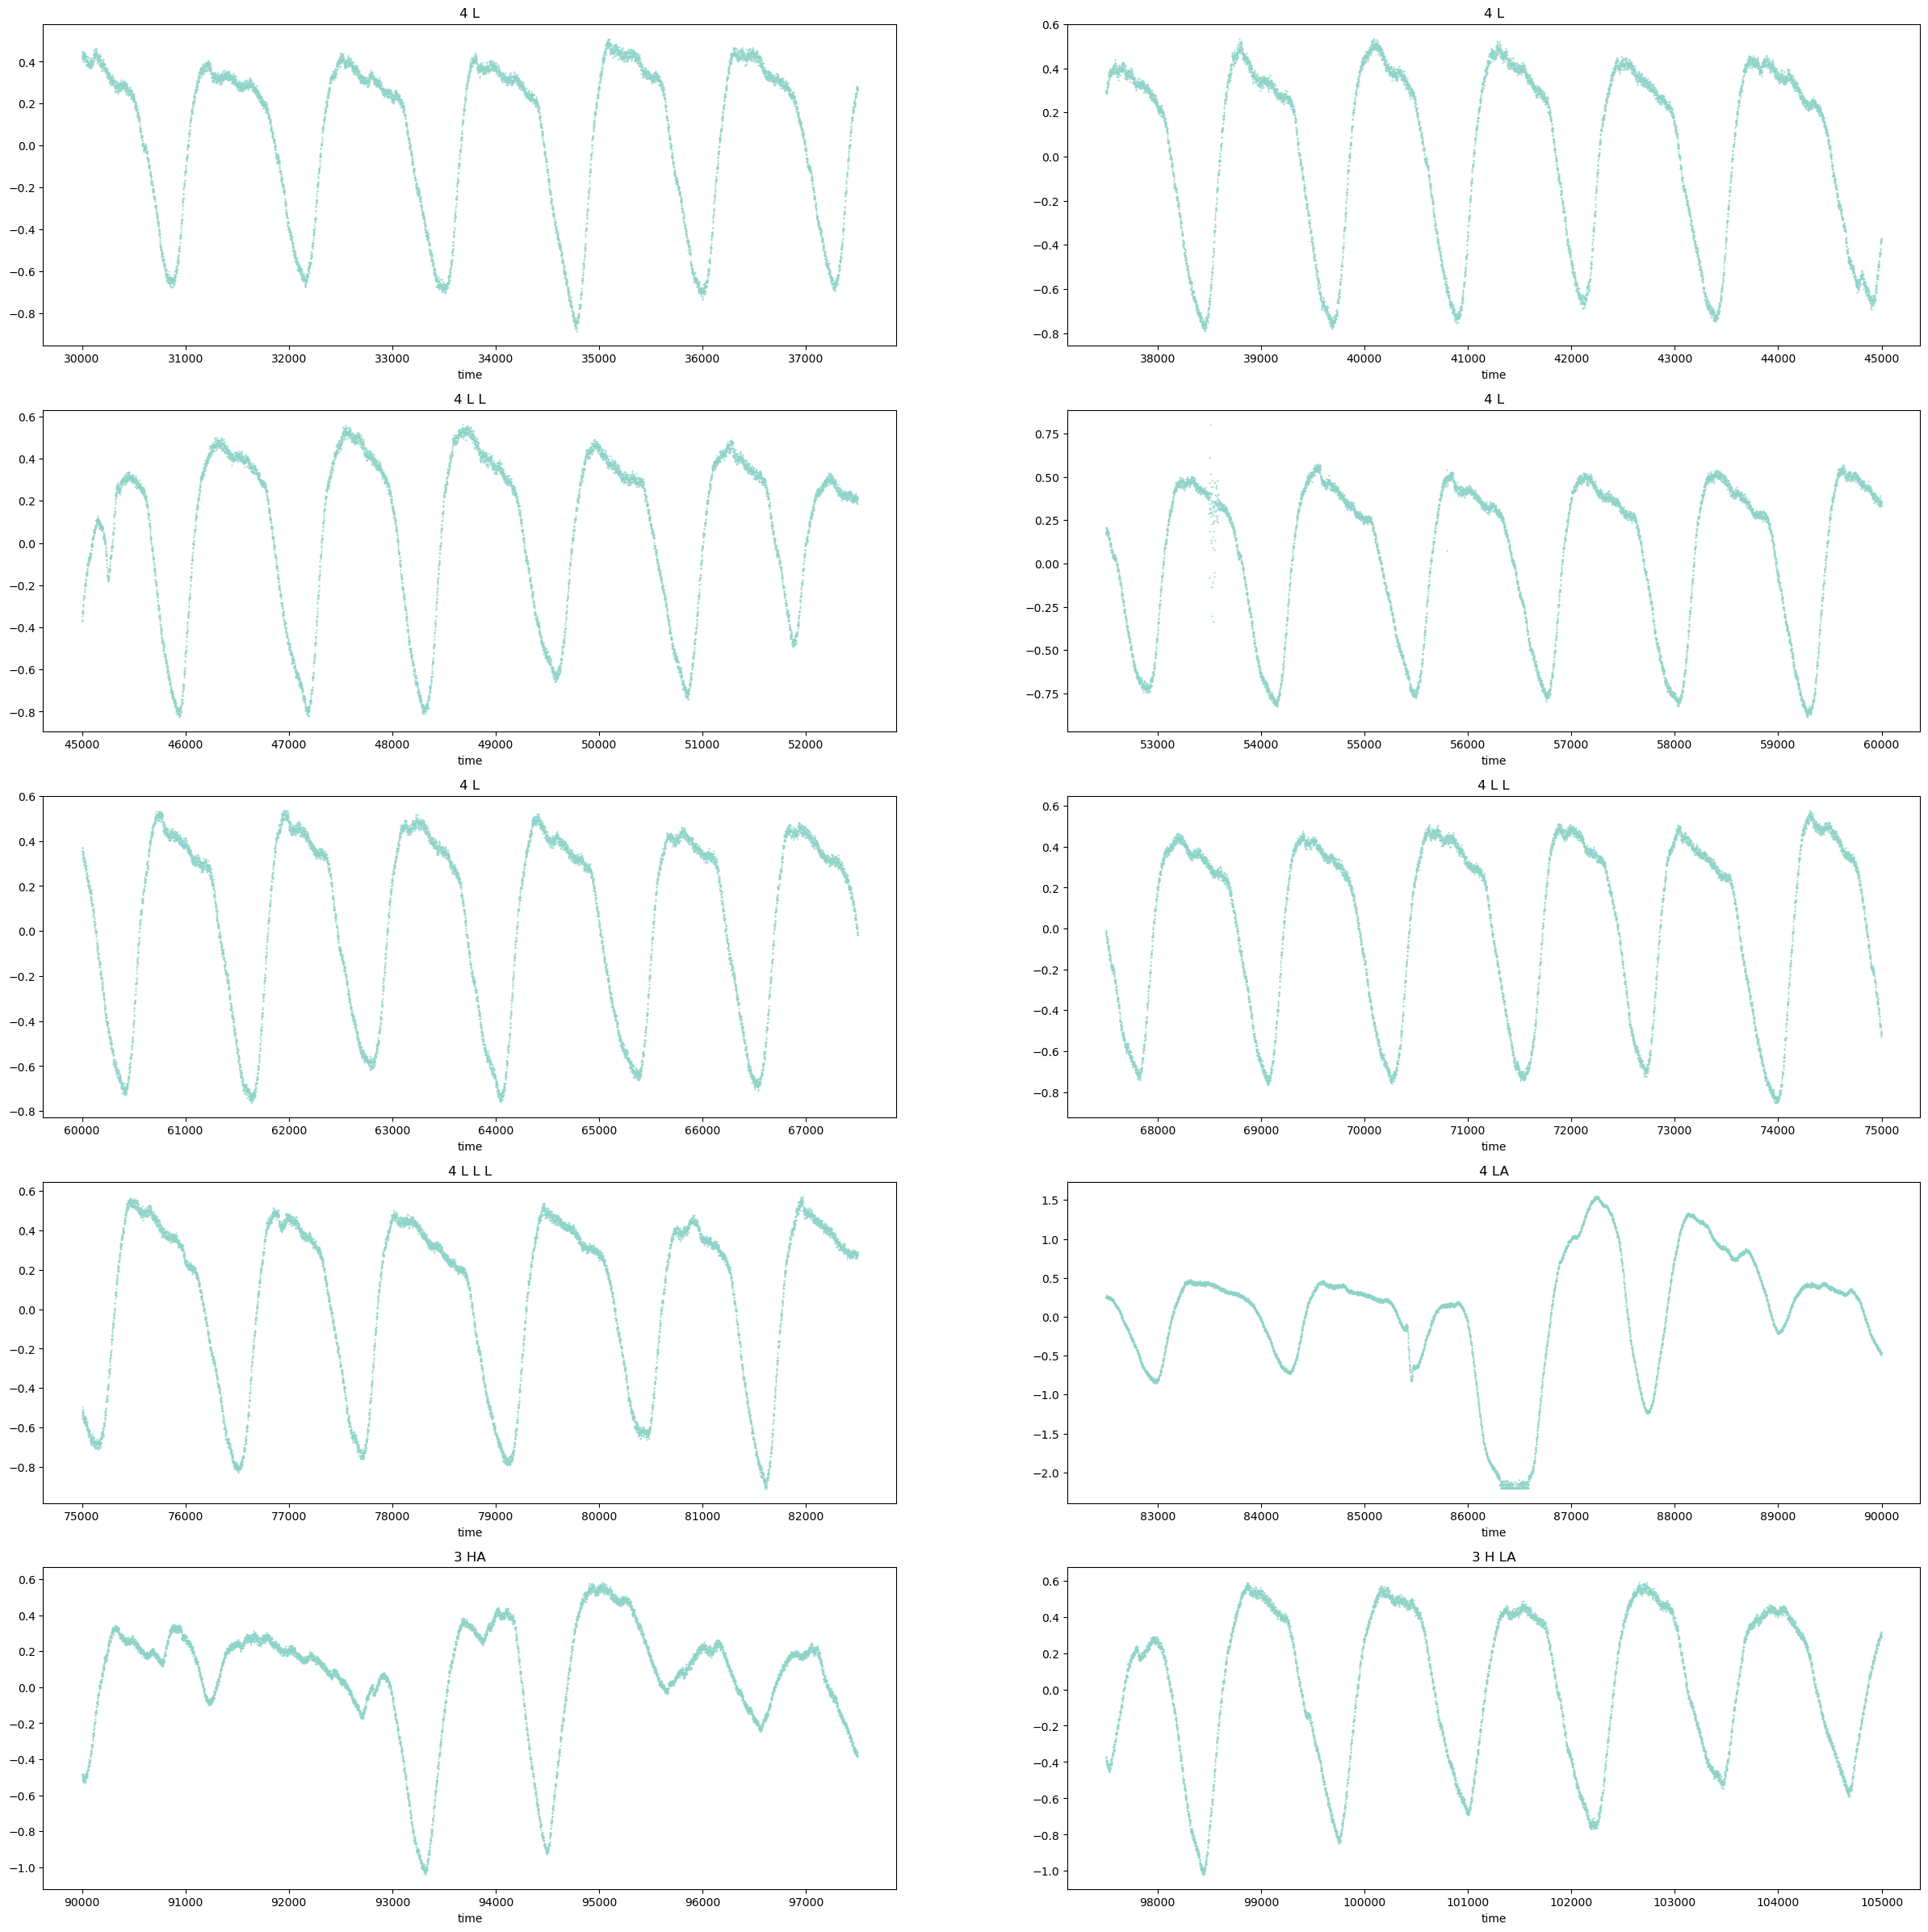

In [55]:
f, ax = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))


# plot 10 signals at 7500 intervals

start_x = 30000
for i in range(10):
    df["signal"].iloc[i * 7500 + start_x:(i + 1) * 7500+start_x].plot(
        style=".",
        ms=1,
        color=color_palette[0],
        ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title("signal " + str(i + 1))
    # get title from annotation
    title = annotation.__dict__["aux_note"][i+start_x//7500]
    # set title
    ax[i // 2, i % 2].set_title(title)